In [ ]:
# load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import shapiro, levene
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
# upload dataset
from google.colab import files
upload = files.upload()

Saving INF2178_A2_data.xlsx to INF2178_A2_data (1).xlsx


In [ ]:
# load the dataframe
df = pd.read_excel("INF2178_A2_data.xlsx",sheet_name="ChildCareCentres")
df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [ ]:
# examine the dataset for NAN values
df.isna().sum()

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64

**One Way ANOVA**

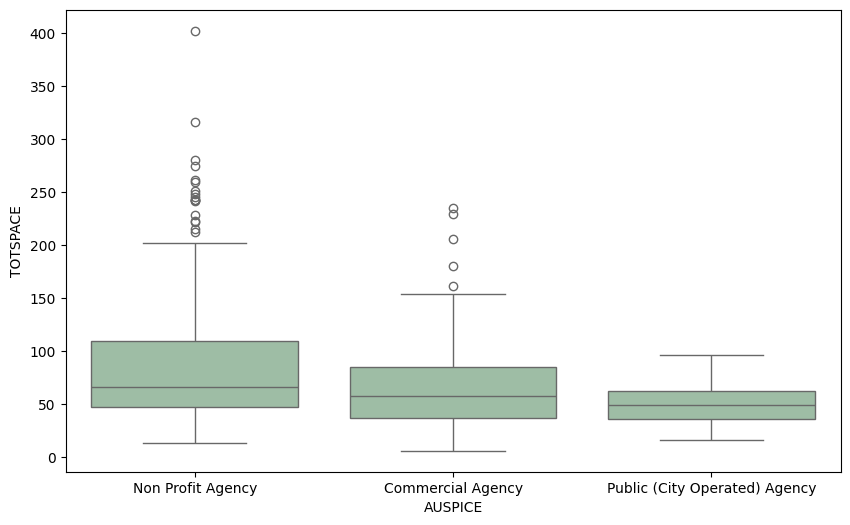

In [ ]:
# create a boxplot to visualize the Total Space distribution of Non Profit Agency, Commercial Agency, and Public Agency
plt.figure(figsize = (10,6))
ax = sns.boxplot(x = 'AUSPICE', y = 'TOTSPACE', data = df, color = '#99c2a2')
plt.show()

In [ ]:
# use ANOVA table to test if there is significant difference of the total space among different AUSPICE
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [ ]:
# post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


In [ ]:
# checking assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(ols('TOTSPACE ~ C(AUSPICE)', data=df).fit().resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [ ]:
# checking assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


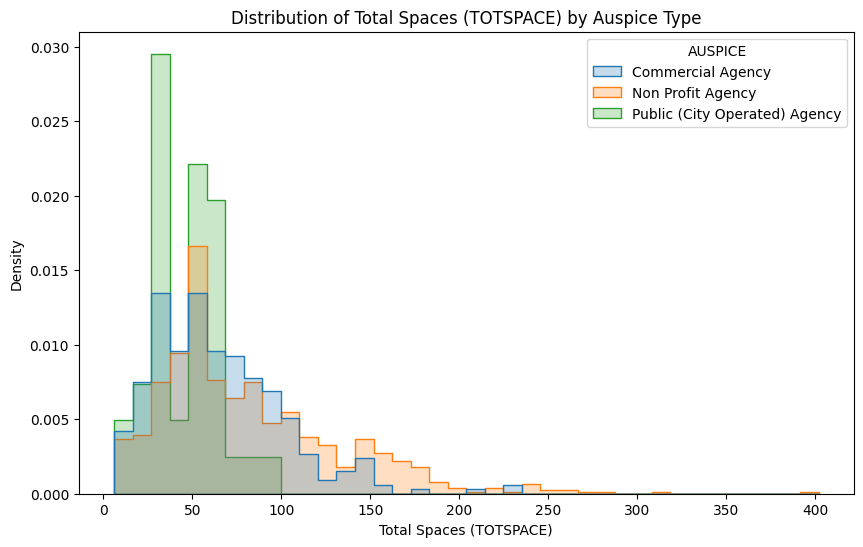

In [ ]:
# visualize the data distribution
df['AUSPICE'] = df['AUSPICE'].astype('category')
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TOTSPACE', hue='AUSPICE', element='step', stat='density', common_norm=False)

plt.title('Distribution of Total Spaces (TOTSPACE) by Auspice Type')
plt.xlabel('Total Spaces (TOTSPACE)')
plt.ylabel('Density')
plt.show()

**Two Way ANOVA**

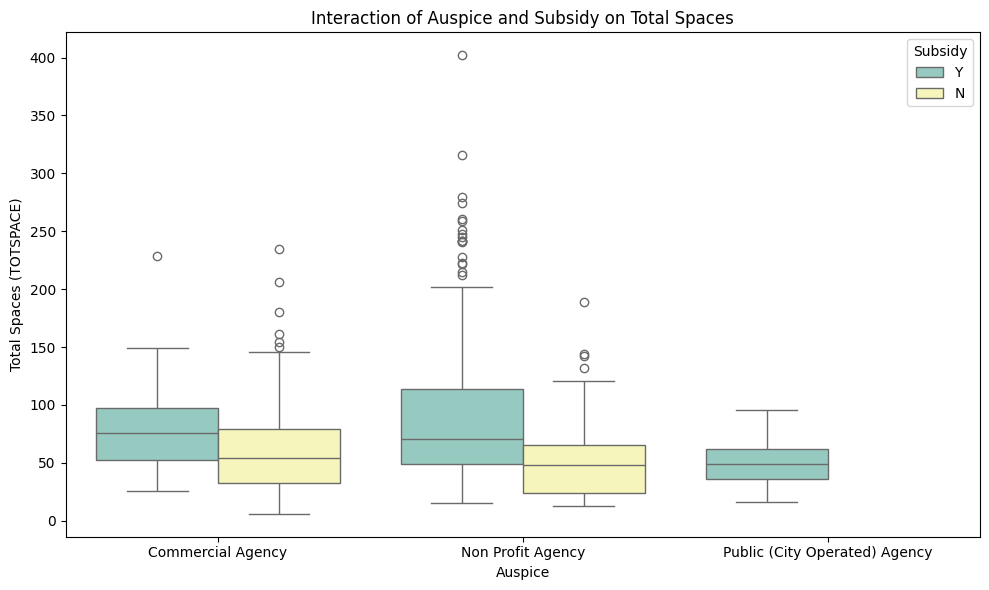

In [ ]:
# visualize the data to see if SUBSIDY has siginificant effect on AUSPICE's TOTSPACE
plt.figure(figsize=(10, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=df, palette="Set3")
plt.title('Interaction of Auspice and Subsidy on Total Spaces')
plt.xlabel('Auspice')
plt.ylabel('Total Spaces (TOTSPACE)')
plt.legend(title='Subsidy')
plt.tight_layout()
plt.show()

In [ ]:
# conduct 2-Way ANOVA to test  if SUBSIDY has siginificant effect on AUSPICE's TOTSPACE
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


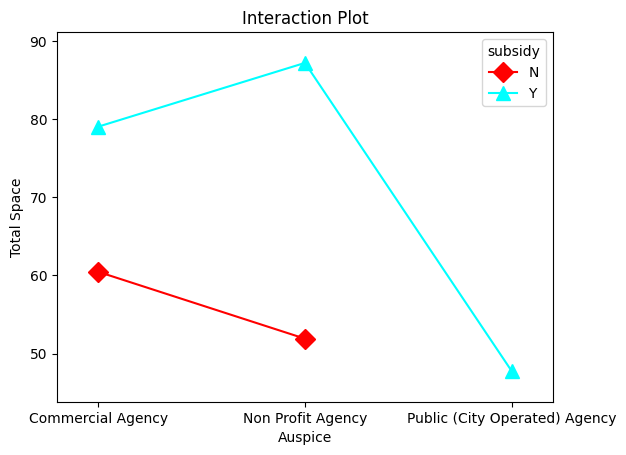

In [ ]:
# create interaction plot
df = pd.read_excel("INF2178_A2_data.xlsx",sheet_name="ChildCareCentres")
interaction_plot(df['AUSPICE'], df['subsidy'], df['TOTSPACE'], markers=['D', '^'], ms=10)
plt.title('Interaction Plot')
plt.xlabel('Auspice')
plt.ylabel('Total Space')
plt.show()

In [ ]:
# conduct post-hoc analysis for AUSPICE
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,4.406270,29.206805,4.501830,0.004333
1,Non Profit Agency,Public (City Operated) Agency,36.177966,9.559488,62.796444,4.514429,0.004205
2,Commercial Agency,Public (City Operated) Agency,19.371429,-9.191627,47.934484,2.252677,0.249650


In [ ]:
# conduct post-hoc analysis for subsidy
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  war

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,34.121178,24.873006,43.36935,10.244062,0.001


In [ ]:
# conduct post-hoc for AUSPICE and subsidy
res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",44.986164,25.584897,64.387430,9.370204,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.145138,-28.465689,28.755965,0.020500,0.900000
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",28.370552,11.192465,45.548638,6.674107,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",40.752830,8.307960,73.197700,5.075887,0.004757
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000


In [36]:
# use Shapiro Wilk test to test if the residuals are normally distrubuted
w, pvalue = shapiro(two_way_totspace_auspice_subsidy.resid)
print('Shapiro-Wilk Test for Normality: W-Value={}, P-Value={}'.format(w, pvalue))

Shapiro-Wilk Test for Normality: W-Value=0.9018619656562805, P-Value=1.5311055543621852e-25
